2025-11-05 13:20:29.033912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762348829.222119      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762348829.274331      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🚀 Loading EfficientNet dataset on Kaggle...

Found 100000 files belonging to 2 classes.


I0000 00:00:1762348996.953159      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1762348996.953854      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.

✅ Dataset loaded successfully!
Train batches: 3125
Validation batches: 625
Test batches: 625

🏷️ Classes: ['fake', 'real']

⏳ Checking sample batches...


Loading batches: 100%|██████████| 5/5 [00:00<00:00, 10.37it/s]


✅ Preview OK
🖼️ Displaying sample images...


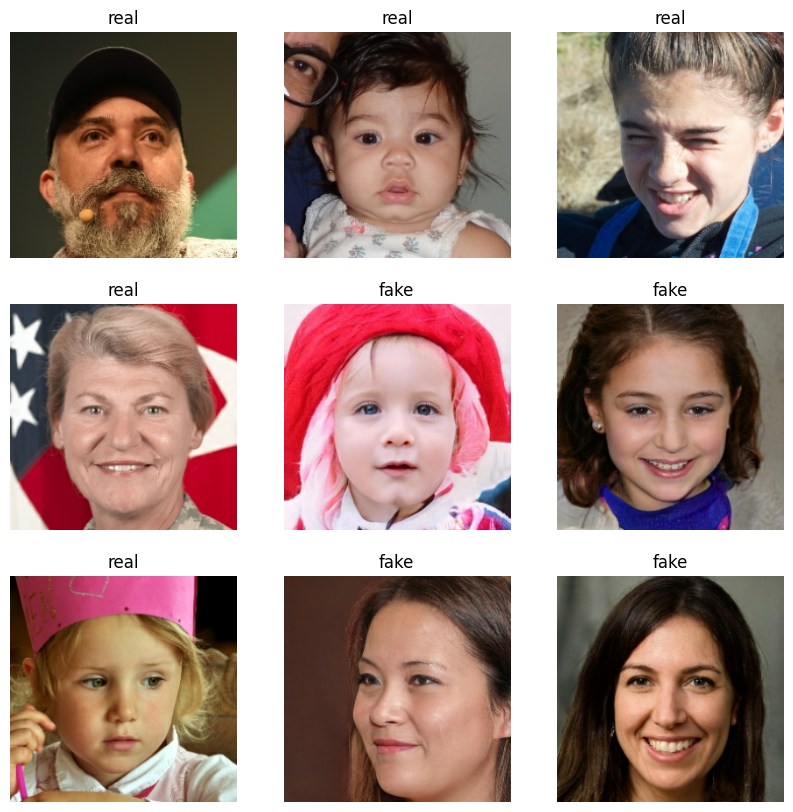

🎯 EfficientNet data pipeline ready in Kaggle!


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

print("🚀 Loading EfficientNet dataset on Kaggle...\n")

# ✅ Kaggle dataset path
# Your dataset structure:
# /kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/{train, valid, test}
data_root = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake"

IMG_SIZE = (224, 224)  
BATCH_SIZE = 32

# === Load training dataset ===
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=f"{data_root}/train",
    label_mode="binary",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

# === Load validation dataset ===
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=f"{data_root}/valid",
    label_mode="binary",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# === Load test dataset ===
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=f"{data_root}/test",
    label_mode="binary",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print("\n✅ Dataset loaded successfully!")
print("Train batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Validation batches:", tf.data.experimental.cardinality(val_ds).numpy())
print("Test batches:", tf.data.experimental.cardinality(test_ds).numpy())

# === Class names ===
class_names = train_ds.class_names
print("\n🏷️ Classes:", class_names)

# === Prefetch for speed ===
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

# === Preview batches ===
print("\n⏳ Checking sample batches...")
for _ in tqdm(train_ds.take(5), desc="Loading batches"):
    pass
print("✅ Preview OK")

# === Show sample batch ===
print("🖼️ Displaying sample images...")
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
plt.show()

print("🎯 EfficientNet data pipeline ready in Kaggle!")


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications.efficientnet import preprocess_input
from tqdm import tqdm  # progress bar

print("⚙ Setting up preprocessing and augmentation for EfficientNet...\n")

# === Data augmentation ===
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
], name="data_augmentation")

def prepare_dataset(dataset, augment=False, name="dataset", show_progress=True):
    """
    Applies augmentation (if True), EfficientNet preprocessing, and prefetch.
    Shows tqdm progress like your earlier Xception code.
    """
    AUTOTUNE = tf.data.AUTOTUNE

    def process_image(image, label):
        if augment:
            image = data_augmentation(image)   # only train
        image = preprocess_input(image)        # EfficientNet normalize
        return image, label

    dataset = dataset.map(process_image, num_parallel_calls=AUTOTUNE)
    dataset = dataset.prefetch(AUTOTUNE)

    if show_progress:
        total_batches = tf.data.experimental.cardinality(dataset).numpy()
        print(f"\n🔄 Preprocessing {name} dataset ({total_batches} batches)...")
        for _ in tqdm(dataset, total=total_batches, desc=f"Processing {name}", unit="batch"):
            pass
        print(f"✅ Finished preprocessing {name} dataset.")

    return dataset

print("🔁 Starting preprocessing for all datasets...\n")

train_prepared = prepare_dataset(train_ds, augment=True,  name="train",       show_progress=True)
val_prepared   = prepare_dataset(val_ds,   augment=False, name="validation", show_progress=True)
test_prepared  = prepare_dataset(test_ds,  augment=False, name="test",       show_progress=True)

print("\n✅ All datasets preprocessed successfully for EfficientNet!\n")

# === Sanity check ===
for images, labels in train_prepared.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("Pixel range: min =", float(tf.reduce_min(images).numpy()), 
          "max =", float(tf.reduce_max(images).numpy()))

print("\n🎉 EfficientNet preprocessing verification completed!")


⚙ Setting up preprocessing and augmentation for EfficientNet...

🔁 Starting preprocessing for all datasets...


🔄 Preprocessing train dataset (3125 batches)...


Processing train: 100%|██████████| 3125/3125 [08:39<00:00,  6.01batch/s]


✅ Finished preprocessing train dataset.

🔄 Preprocessing validation dataset (625 batches)...


Processing validation: 100%|██████████| 625/625 [00:47<00:00, 13.25batch/s]


✅ Finished preprocessing validation dataset.

🔄 Preprocessing test dataset (625 batches)...


Processing test: 100%|██████████| 625/625 [00:44<00:00, 14.10batch/s]


✅ Finished preprocessing test dataset.

✅ All datasets preprocessed successfully for EfficientNet!

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 1)
Pixel range: min = 0.0 max = 255.0

🎉 EfficientNet preprocessing verification completed!


In [5]:
# ───────────────────────────────
# 🧠 EfficientNet-B0 Model (DeepFake Detection) — Kaggle TF 2.20 Compatible
# ───────────────────────────────

import tensorflow as tf
import keras_cv
from tensorflow.keras import layers, models, optimizers, callbacks

# ✅ GPU Check
print("🔍 Devices:", tf.config.list_physical_devices('GPU'))
print("✅ TF Version:", tf.__version__)

# === Hyperparameters ===
IMG_SIZE = (224, 224, 3)
EPOCHS = 30
LR = 1e-4

# === Base Model (EfficientNet B0 equivalent) ===
base_model = keras_cv.models.EfficientNetV2Backbone.from_preset(
    "efficientnetv2_b0_imagenet"
)
base_model.trainable = False  # ✅ freeze backbone

# === Build model ===
inputs = layers.Input(shape=IMG_SIZE)
x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = models.Model(inputs, outputs)

# === Compile ===
model.compile(
    optimizer=optimizers.Adam(LR),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# === Callbacks ===
checkpoint = callbacks.ModelCheckpoint(
    "efficientnet_b0_best.keras",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

early_stop = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

print("\n✅ EfficientNet-B0 model loaded (KerasCV V2-B0) and ready!\n")
model.summary()


🔍 Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
✅ TF Version: 2.18.0

✅ EfficientNet-B0 model loaded (KerasCV V2-B0) and ready!



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficient_net_v2b0_backbone     │ (None, 7, 7, 1280)     │     5,919,312 │
│ (EfficientNetV2Backbone)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,247,505 (23.83 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [6]:
import sys, os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LambdaCallback
import tensorflow as tf

print("🚀 Starting training... with resume enabled ✅\n")

# === Hyperparameters ===
EPOCHS = 30

SAVE_PATH = "/kaggle/working/deepfake_efficientnet_b0_best.keras"

# === Load model if exists (resume training) ===
if os.path.exists(SAVE_PATH):
    print("📂 Found saved model — resuming training...")
    model = tf.keras.models.load_model(SAVE_PATH)
else:
    print("✨ Starting fresh training...")

# === Callbacks ===
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

checkpoint = ModelCheckpoint(
    SAVE_PATH,  # ✅ Stored in persistent working directory
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# ✅ Flush logs safely
flush_callback = LambdaCallback(on_epoch_end=lambda e, l: sys.stdout.flush())

# ✅ Keep session alive by printing heartbeat
keep_alive = LambdaCallback(on_epoch_end=lambda e, l: print("🔥 still training..."))

# === Train Model ===
history = model.fit(
    train_prepared,
    validation_data=val_prepared,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr, checkpoint, flush_callback, keep_alive],
    verbose=1
)

print("\n✅ Training complete! Best model stored at:")
print(SAVE_PATH)


🚀 Starting training... with resume enabled ✅

✨ Starting fresh training...
Epoch 1/30


I0000 00:00:1762349701.800324     111 service.cc:148] XLA service 0x787984004d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762349701.802889     111 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762349701.802912     111 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762349704.246278     111 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/3125 ━━━━━━━━━━━━━━━━━━━━ 2:40 52ms/step - accuracy: 0.5391 - loss: 0.6848   

I0000 00:00:1762349715.737621     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3124/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7041 - loss: 0.5681
Epoch 1: val_accuracy improved from -inf to 0.75170, saving model to /kaggle/working/deepfake_efficientnet_b0_best.keras
🔥 still training...
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 488s 147ms/step - accuracy: 0.7041 - loss: 0.5681 - val_accuracy: 0.7517 - val_loss: 0.4948 - learning_rate: 1.0000e-04
Epoch 2/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7866 - loss: 0.4581
Epoch 2: val_accuracy improved from 0.75170 to 0.76695, saving model to /kaggle/working/deepfake_efficientnet_b0_best.keras
🔥 still training...
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 454s 145ms/step - accuracy: 0.7866 - loss: 0.4581 - val_accuracy: 0.7670 - val_loss: 0.4688 - learning_rate: 1.0000e-04
Epoch 3/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.8049 - loss: 0.4269
Epoch 3: val_accuracy improved from 0.76695 to 0.79865, saving model to /kaggle/working/deepfake_efficientnet_b0_best.keras
🔥 still training...
3125/3125 

In [11]:
import pickle

# Convert all values to float to avoid TensorFlow JSON issues
history_clean = {k: [float(v) for v in vals] for k, vals in history.history.items()}

with open("efficientnet_b0_history.pkl", "wb") as f:
    pickle.dump(history_clean, f)

print("✅ Training history saved successfully as 'efficientnet_b0_history.pkl'")


✅ Training history saved successfully as 'efficientnet_b0_history.pkl'


In [12]:
import os
os.listdir()


['efficientnet_b0_history.pkl',
 '.virtual_documents',
 'deepfake_efficientnet_b0_best.keras']

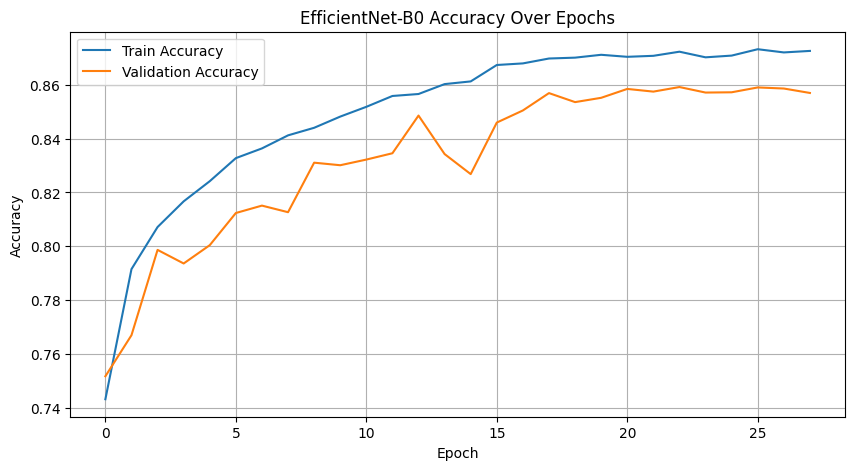

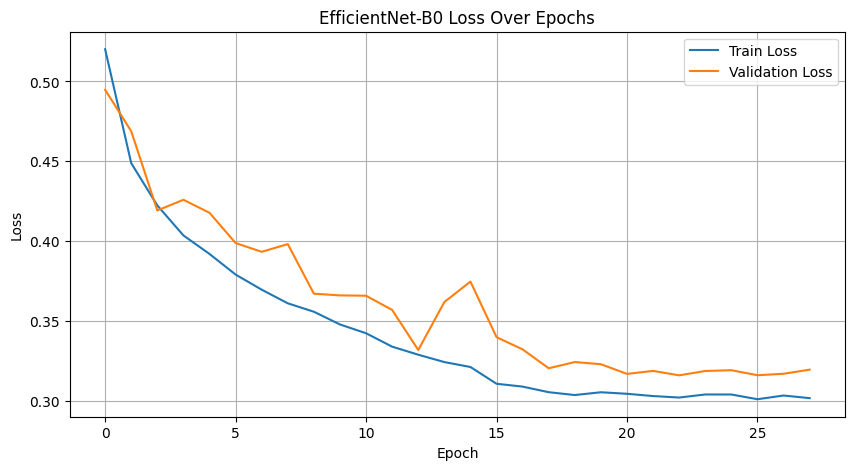

In [13]:
import pickle
import matplotlib.pyplot as plt

# Load history file
with open("efficientnet_b0_history.pkl", "rb") as f:
    history_dict = pickle.load(f)

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("EfficientNet-B0 Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.legend()
plt.title("EfficientNet-B0 Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


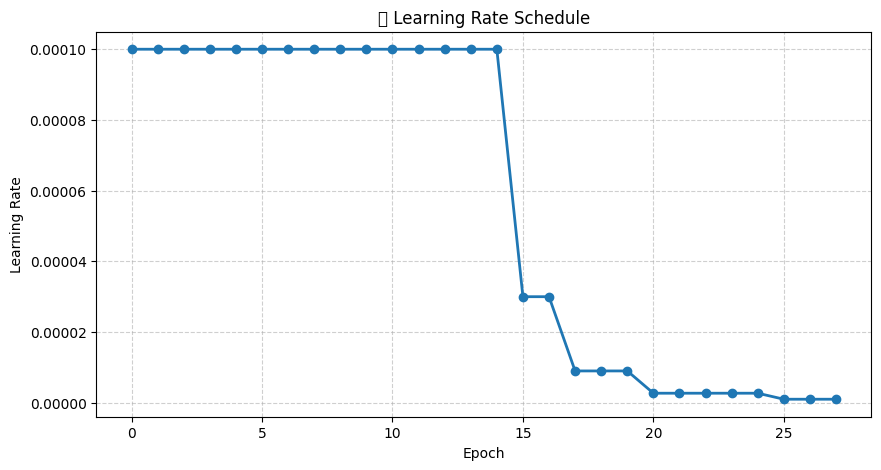

In [14]:
import pickle
import matplotlib.pyplot as plt

# Load training history
with open("efficientnet_b0_history.pkl", "rb") as f:
    history_dict = pickle.load(f)

# Determine the correct key name
lr_key = None
for key in history_dict.keys():
    if key in ["lr", "learning_rate"]:
        lr_key = key
        break

if lr_key is None:
    print("⚠️ Learning rate key not found in history.")
else:
    # Plot LR Schedule
    plt.figure(figsize=(10,5))
    plt.plot(history_dict[lr_key], marker='o', linewidth=2)
    plt.title("📉 Learning Rate Schedule")
    plt.xlabel("Epoch")
    plt.ylabel("Learning Rate")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


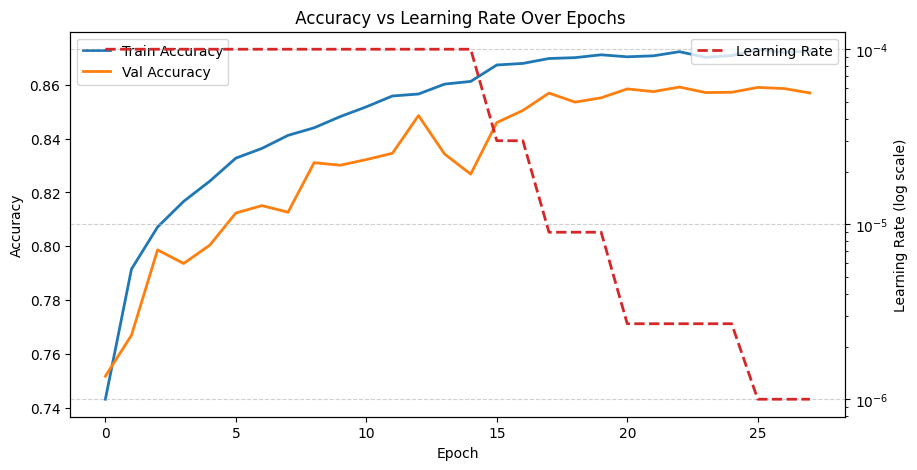

In [15]:
import matplotlib.pyplot as plt
import pickle

# Load history file
with open("efficientnet_b0_history.pkl", "rb") as f:
    history_dict = pickle.load(f)

#  Detect correct LR key
lr_key = None
for key in history_dict.keys():
    if key in ["lr", "learning_rate"]:
        lr_key = key

if lr_key is None:
    raise KeyError(" Learning rate not found in history dict — no LR callback used or key missing.")

# Plot Accuracy + LR
fig, ax1 = plt.subplots(figsize=(10,5))

# Accuracy curves
ax1.plot(history_dict['accuracy'], label='Train Accuracy', color='tab:blue', linewidth=2)
ax1.plot(history_dict['val_accuracy'], label='Val Accuracy', color='tab:orange', linewidth=2)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(loc='upper left')

# LR curve
ax2 = ax1.twinx()
ax2.plot(history_dict[lr_key], label='Learning Rate', color='tab:red', linestyle='--', linewidth=2)
ax2.set_ylabel("Learning Rate (log scale)")
ax2.set_yscale("log")
ax2.legend(loc='upper right')

plt.title(" Accuracy vs Learning Rate Over Epochs")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [16]:
# Check if test_prepared exists
print("Does test_prepared exist? ->", 'test_prepared' in globals())

# If exists, show its type & one batch preview
try:
    for images, labels in test_prepared.take(1):
        print("✅ test_prepared found!")
        print("Images shape:", images.shape)
        print("Labels shape:", labels.shape)
        print("Pixel range: min =", float(tf.reduce_min(images)), 
              "max =", float(tf.reduce_max(images)))
        break
except Exception as e:
    print("⚠️ Error reading test_prepared:", e)


Does test_prepared exist? -> True
✅ test_prepared found!
Images shape: (32, 224, 224, 3)
Labels shape: (32, 1)
Pixel range: min = 0.0 max = 255.0


 Loading model from: deepfake_efficientnet_b0_best.keras


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 492 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


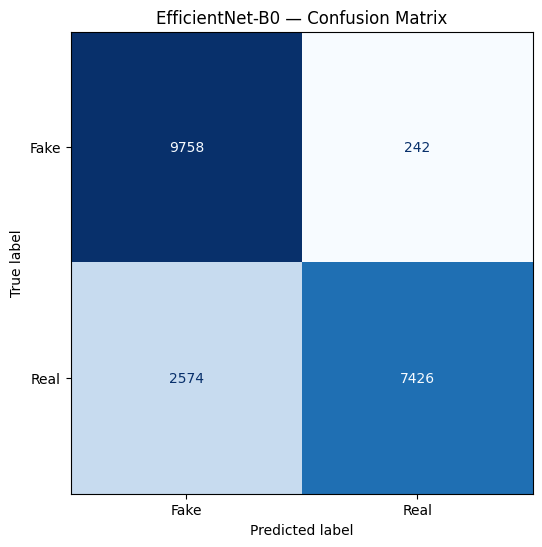


 Classification Report:

              precision    recall  f1-score   support

        Fake       0.79      0.98      0.87     10000
        Real       0.97      0.74      0.84     10000

    accuracy                           0.86     20000
   macro avg       0.88      0.86      0.86     20000
weighted avg       0.88      0.86      0.86     20000



In [18]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#  Load your EfficientNet-B0 model
model_path = "deepfake_efficientnet_b0_best.keras"
print(f" Loading model from: {model_path}")

model = tf.keras.models.load_model(model_path)

#  Generate predictions
y_true, y_pred_prob = [], []

for images, labels in test_prepared:
    preds = model.predict(images, verbose=0)
    y_pred_prob.extend(preds)
    y_true.extend(labels.numpy())

y_true = np.array(y_true).flatten()
y_pred = (np.array(y_pred_prob).flatten() > 0.5).astype(int)

#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = ["Fake", "Real"]

fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", ax=ax, colorbar=False)
plt.title("EfficientNet-B0 — Confusion Matrix")
plt.show()

# Classification Report
print("\n Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
